In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import numpy as np


In [2]:
df_NIESEN_DATA = pd.read_csv('Resources/NIESEN_VOD_VIEWING_HABITS-V4.CSV')
display(df_NIESEN_DATA.head(5))
print(df_NIESEN_DATA.columns)

,row,age,username,gender,city,state,zip,lat,lng,freq,...,Crackle,CBS All Access,IMDb TV,Disney+,HBO MAX,NBC,Rent or Buy,FOX,Peacock,Tubi
0,0,62,fabian_couture,Male,Incline Village,NV,89451,39.2564,-119.9521,1-DAILY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,60,winford_underwood,Male,Dennard,AR,72629,35.7252,-92.5575,2-FEW_TIMES_WEEK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,34,darell_akers,Male,Ailey,GA,30410,32.2143,-82.4762,1-DAILY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,73,don_macon,Male,Double Springs,AL,35553,34.1387,-87.3974,1-DAILY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,46,glenda_corona,Female,Silver Spring,MD,20997,38.9907,-77.0261,2-FEW_TIMES_WEEK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['row', 'age', 'username', 'gender', 'city', 'state', 'zip', 'lat',
       'lng', 'freq', 'services', 'hulu', 'youtube', 'Apple TV+', 'FX',
       'netflix', 'fuboTV', 'amazon', 'PlutoTV', 'Discovery+', 'Starz',
       'Showtime', 'Philo', 'Crackle', 'CBS All Access', 'IMDb TV', 'Disney+',
       'HBO MAX', 'NBC', 'Rent or Buy', 'FOX', 'Peacock', 'Tubi'],
      dtype='object')


In [13]:
# putting into bins for only 4 formats (Netflix, Amazon Prime, Disney+, Hulu)
df=df_NIESEN_DATA
bins=[17,34,50,65,100]
df['age_range'] = pd.cut(df['age'], bins=bins, labels=['18-34','34-50','50-65','65+'])
cleaned_df = df.loc[:, ['age','age_range','gender','state','freq','netflix','amazon','Disney+','hulu', 'services']]
cleaned_df

,age,age_range,gender,state,freq,netflix,amazon,Disney+,hulu,services
0,62,50-65,Male,NV,1-DAILY,NaN,NaN,NaN,1.0,{'hulu': 1}
1,60,50-65,Male,AR,2-FEW_TIMES_WEEK,NaN,NaN,NaN,NaN,"{'youtube': 1, 'Apple TV+': 1}"
2,34,18-34,Male,GA,1-DAILY,NaN,NaN,NaN,1.0,{'hulu': 1}
3,73,65+,Male,AL,1-DAILY,NaN,NaN,NaN,NaN,{'FX': 1}
4,46,34-50,Female,MD,2-FEW_TIMES_WEEK,1.0,NaN,NaN,1.0,"{'hulu': 1, 'netflix': 1}"
...,...,...,...,...,...,...,...,...,...,...
9860,76,65+,Female,ND,3-FEWER_THREE_PER_MONTH,NaN,NaN,NaN,1.0,"{'Apple TV+': 1, 'hulu': 1}"
9861,18,18-34,Female,SC,1-DAILY,1.0,NaN,NaN,1.0,"{'youtube': 1, 'hulu': 1, 'netflix': 1}"
9862,28,18-34,Male,NY,1-DAILY,1.0,NaN,NaN,NaN,"{'Showtime': 1, 'netflix': 1, 'Discovery+': 1}"
9863,58,50-65,Male,IA,3-FEWER_THREE_PER_MONTH,NaN,NaN,NaN,NaN,{'youtube': 1}


In [17]:
cleaned_df.describe()

,age,netflix,amazon,Disney+,hulu
count,9865.000000,4594.0,1443.0,421.0,2138.0
mean,47.773441,1.0,1.0,1.0,1.0
std,17.876714,0.0,0.0,0.0,0.0
min,18.000000,1.0,1.0,1.0,1.0
25%,32.000000,1.0,1.0,1.0,1.0
50%,47.000000,1.0,1.0,1.0,1.0
75%,63.000000,1.0,1.0,1.0,1.0
max,79.000000,1.0,1.0,1.0,1.0


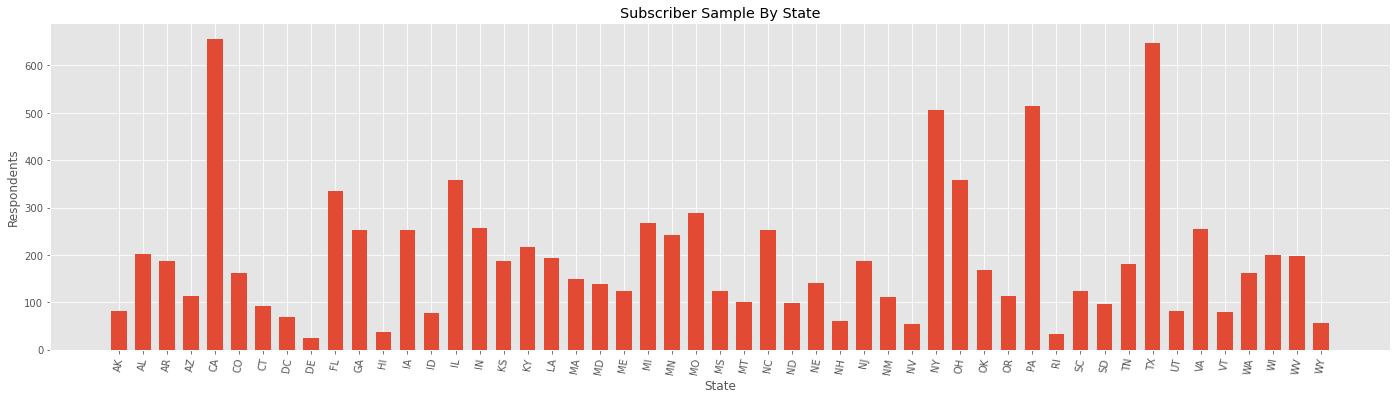

In [14]:
df['age_range'] = pd.cut(df['age'], bins=[17, 34, 50, 65, 100], labels=['18-34','34-50','50-65','65+']) 
dfg = df.groupby('state').count()
fig, (ax) = plt.subplots(1, figsize=(24,6))
ax = plt.subplot(111) 
ax.bar(dfg.index, dfg.age, width=.65 )      
ax.set(title='Subscriber Sample By State', ylabel='Respondents', xlabel='State')  
plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
plt.show() 

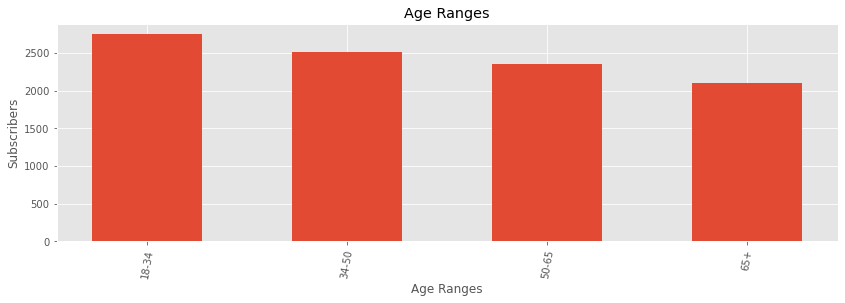

In [15]:
df=df_NIESEN_DATA 
bins = [18, 34, 50, 65, 100]
df['age_range'] = pd.cut(df['age'], bins=bins, labels=['18-34','34-50','50-65','65+']) 
freq_list = ['1-DAILY','2-FEW_TIMES_WEEK','3-FEWER_THREE_PER_MONTH' ] 

dfg = df.groupby('age_range').count()
fig, (ax, ax1) = plt.subplots(2, figsize=(14,4))
ax = plt.subplot(111) 
ax.bar(dfg.index, dfg.age, width=.55 )      
ax.set(title='Age Ranges', ylabel='Subscribers', xlabel='Age Ranges')  
plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
plt.show() 

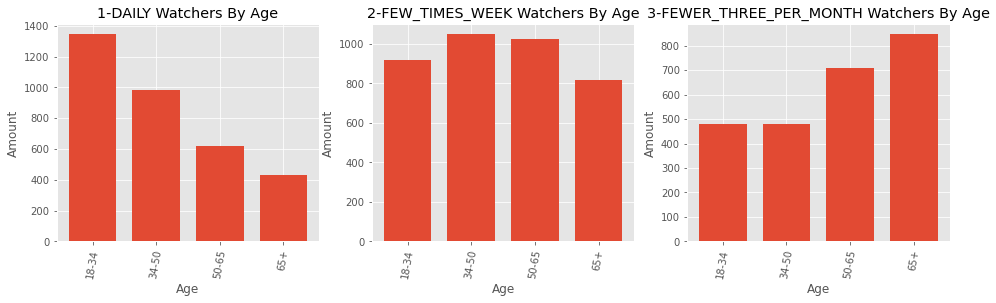

In [16]:
 
pindx = 0
fig,(ax) = plt.subplots(2, figsize=(16, 4))  
for f in freq_list:    
    pindx=pindx+1
    ax = plt.subplot(1, 3, pindx) 
    PERDAY = df.loc[df.freq==f]  
    y1=PERDAY.loc[:,['freq', 'age_range']].groupby('age_range', as_index=False).count()  
    ax.bar(y1.age_range, y1.freq, width=.75 )      
    ax.set(title=f'{f} Watchers By Age', ylabel='Amount', xlabel='Age')  
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
 
     
plt.show()